# Scatter Plots

Another commonly used plot type is the scatter plot. Instead of points being joined by line segments, here the points are represented individually by some symbol (a circle by default). Let's start by setting up the notebook for plotting:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Scatter Plots with `plt.plot`

In the previous notebook we looked at `plt.plot` and `ax.plot` to produce line plots. Turns out that this same function can produce scatter plots as well:

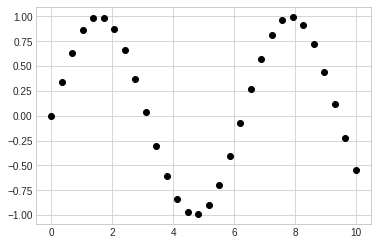

In [2]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for plotting. The full list of available symbols can be seen in the documentation of `plt.plot`, but we'll show a number of the more common ones here:

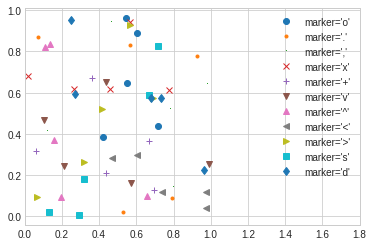

In [3]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

We can go even further by specifying these character codes together with line and color codes to plot pints along with a line connecting them:

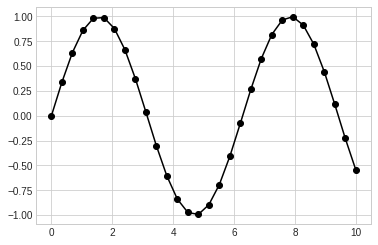

In [4]:
plt.plot(x, y, '-ok');

We can also supply additional keyword arguments to `plt.plot` to specify a wide range of properties of the lines and the markers:

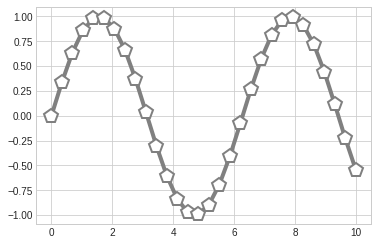

In [5]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2);

## Scatter Plots with `plt.scatter`

A more powerful method of creating scatter plots is the `plt.scatter` function:

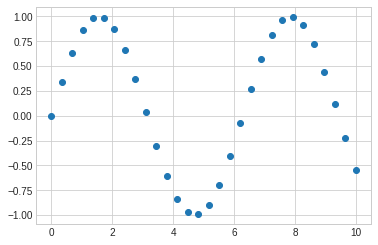

In [6]:
plt.scatter(x, y, marker='o');

The primary difference of `plt.scatter` from `plt.plot` is that it can be used to create scatter plots where the properties of each individual point can be individually controlled or mapped to data.

To ilustrate this, let's create a random scatter plots with points of many colors and size. To improve visibility of the overlapping points, we'll also use the `alpha` keyword to adjust transparency level:

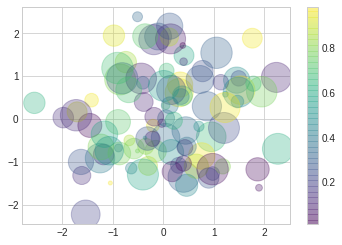

In [7]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Notice that the color argument is automatically mapped to a color scale (shown by the `colorbar()` command), and that the size argument is given in pixels.

Let's take a look at how we could use the size and color of each point to convey information about the data. We will be using the well-known Iris dataset:

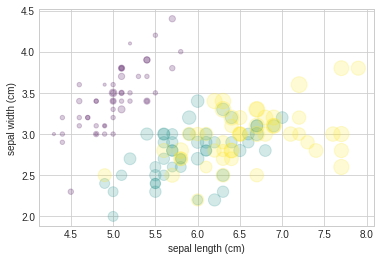

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data: sepal length in the x axis, sepal width in the y axis, petal width with the size of each point, and species of flower with the colors.

## `plot` Versus `scatter`: A Note on Efficiency

Aside from the different features that `plt.plot` and `plt.scatter` offer, why should we consider to use one over the other? As datasets get larger than a few thousand points, `plt.plot` can be noticeably more efficient than `plt.scatter`. This is the case because of the capability of `plt.scatter` to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. 